<h2>Free2Move Project - ANALYZE E-COMMERCE DATA - Fayçal REKIBI </h2>

<h2>1) Imports</h2>

In [1]:
import random
import sqlite3
from sqlite3 import Error

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

<h2>2) Read CVS Files - Create DataFrames</h2>

In [2]:
df_customers = pd.read_csv('data/customer.csv')
df_items = pd.read_csv('data/items.csv')
df_orders = pd.read_csv('data/orders.csv')
df_products = pd.read_csv('data/products.csv')

In [3]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
df_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [5]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [6]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


<h2>3) Update Data to have reapeat customers </h2>

<h3>A) Print unique values ("customer_id", "order_id") from "Order" DataFrame </h3>

In [7]:
len(set(df_orders.customer_id))

99441

In [8]:
len(set(df_orders.order_id))

99441

In [9]:
# As we can see, there's no repeat customer

<h3>B) Randomly select "customer_id" to keep</h3>

In [10]:
split_ratio = random.uniform(0.3,0.35)
split_ratio

0.32404642061976496

In [11]:
list_customer_id = df_orders.customer_id.to_list()
list_customers_we_keep = list_customer_id[:int(len(list_customer_id)*split_ratio)]
len(list_customers_we_keep)

32223

<h3>C) We update "customer_id" by taking a random "customer_id" from "list_customers_we_keep"</h3>

In [12]:
df_orders.customer_id = df_orders.customer_id.apply(
    lambda x: list_customers_we_keep[random.randint(0, len(list_customers_we_keep)-1)])

<h3>D) Verify that we've repeat customers by printing len of unique values</h3>

In [13]:
len(set(df_orders.order_id))

99441

In [14]:
len(set(df_orders.customer_id))

30795

<h2>4) Create a new column "item_id" into "Items" DataFrame, to store the primary key</h2>

In [15]:
item_id = range(df_items.shape[0])
df_items['item_id'] = item_id
reorder_columns = ['item_id', 'order_id', 'order_item_id', 'product_id', 'seller_id',
                   'shipping_limit_date', 'price', 'freight_value']
df_items = df_items.reindex(columns=reorder_columns)

In [16]:
df_items

,item_id,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...
112645,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


<h2>5) Delete rows if a primary key is missing or full rows empty </h2>

In [17]:
df_items = df_items.dropna(how='all')

df_customers = df_customers.dropna(how='all')
df_customers = df_customers.dropna(subset=['customer_id'])

df_products = df_products.dropna(how='all')
df_products = df_products.dropna(subset=['product_id'])

df_orders = df_orders.dropna(how='all')
df_orders = df_orders.dropna(subset=['order_id'])

<h2>6) Create a new SQLite3 database "faycal_test" and the tables: "Item", "Product", "Order_" and "Customer"</h2>

In [18]:
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as err:
        print(err)
        raise(err)
    return conn


def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as err:
        print(err)
        raise(err)
    return True

In [19]:
conn = create_connection('faycal_test.db')    
conn

In [20]:
create_table(conn, """
                   CREATE TABLE IF NOT EXISTS Customer(
                       customer_id TEXT PRIMARY KEY,
                       customer_unique_id TEXT,
                       customer_zip_code_prefix INTEGER,
                       customer_city TEXT,
                       customer_state TEXT);
                   """)

True

In [21]:
create_table(conn, """
                   CREATE TABLE IF NOT EXISTS Item(
                       item_id TEXT PRIMARY KEY,
                       order_id TEXT,
                       order_item_id INTEGER,
                       product_id TEXT,
                       seller_id INTEGER,
                       shipping_limit_date TEXT,
                       price TEXT,
                       freight_value TEXT);
                   """)

True

In [22]:
create_table(conn, """
                   CREATE TABLE IF NOT EXISTS Product(
                       product_id TEXT PRIMARY KEY,
                       product_category_name TEXT,
                       product_name_lenght INTEGER,
                       product_description_lenght TEXT,
                       product_photos_qty INTEGER,
                       product_weight_g TEXT,
                       product_length_cm TEXT,
                       product_height_cm TEXT,
                       product_width_cm TEXT,
                       product_category_name_english TEXT);
                   """)

True

In [23]:
create_table(conn, """
                   CREATE TABLE IF NOT EXISTS Order_(
                       order_id TEXT PRIMARY KEY,
                       customer_id TEXT,
                       order_status TEXT,
                       order_purchase_timestamp TEXT,
                       order_approved_at TEXT,
                       order_delivered_carrier_date TEXT,
                       order_delivered_customer_date TEXT,
                       order_estimated_delivery_date TEXT);
                   """)

True

<h2>7) Insert values - Check dimensions (DataFrames - Tables) </h2>

In [24]:
df_customers.to_sql(name= 'Customer', con=conn, if_exists='append', index=False)
df_items.to_sql(name= 'Item', con=conn, if_exists='append', index=False)
df_orders.to_sql(name="Order_", con=conn, if_exists='append', index=False)
df_products.to_sql(name= 'Product', con=conn, if_exists='append', index=False)

<h3>A) Table Order_</h3>

In [25]:
df = pd.read_sql_query("select * from Order_;", conn)
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,171437bfa7315ccc0aa4c38c44d2ff92,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,2db1214d4615da67d9b35f7084542bdf,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,3ce0a1f76b4518e1cd3caa673f6a5856,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,bd5eec32a64e9b19766a2a9f9dfb2a77,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,a2fec579a2a42e83cc3779891266ce5a,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,97558121050ad51b5f8467919840fd7b,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,a5b68a10e087c33ad9b0736f87013735,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,f5030047617e208f039e76966cce8406,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,42f2079a590ca777d54f3ccad03c29f2,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [26]:
df_orders.shape

(99441, 8)

<h3>B) Table Customer</h3>

In [27]:
df = pd.read_sql_query("select * from Customer;", conn)
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [28]:
df_customers.shape

(99441, 5)

<h3>C) Table Item</h3>

In [29]:
df = pd.read_sql_query("select * from Item;", conn)
df

,item_id,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9,18.14
...,...,...,...,...,...,...,...,...
112645,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.0,36.53
112647,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.9,16.95
112648,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [30]:
df_items.shape

(112650, 8)

<h3>D) Table Product</h3>

In [31]:
df = pd.read_sql_query("SELECT * from Product", conn)
df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [32]:
df_products.shape

(32951, 10)

<h2>8) Create a customer vision that centralizes sales by customers and identify top customers. TOP 10</h2>

In [33]:
df = pd.read_sql_query("""
SELECT customer_id, COUNT(*) as nb_orders
FROM Order_
GROUP BY customer_id
ORDER BY nb_orders DESC
LIMIT 10;
""", conn)
df

,customer_id,nb_orders
0,3b1edd46e86d39255b0c8fcf0c86525d,12
1,3e3f791730f212dfe837272bd313fb60,12
2,a157e911caa6af2ed1cdb37830ec8b58,12
3,1d19f123d715d31a525094a81bbea5ef,11
4,3c6612419abd34435aa81f8a6a2214b5,11
5,665912947056efcc3f35f77e7f67cf9f,11
6,86bc7b8a34a40c88ad0b7d0cb8de17b1,11
7,87ee52278f49510a6573beedd409e43c,11
8,94d00a2a42c7af169f6f5f44f7a86b75,11
9,a7263ca2a95cbbda501cdb4e676dbfb5,11


<h2>9) How many customers are repeaters ?</h2>

In [34]:
df = pd.read_sql_query("""
SELECT COUNT(nb_orders) AS nb_repeat_customers
FROM
( 
    SELECT COUNT(*) AS nb_orders
    FROM Order_
    GROUP BY customer_id
)
WHERE nb_orders>1;
""", conn)
df

,nb_repeat_customers
0,26169


<h2>10) What is the average number of items per basket?</h2>

In [35]:
df = pd.read_sql_query("""
SELECT AVG(nb_items_per_basket) AS avg_nb_items_per_basket
FROM
( 
    SELECT COUNT(*) AS nb_items_per_basket 
    FROM Item 
    GROUP BY order_id
);
""", conn)
df

,avg_nb_items_per_basket
0,1.141731


<h2>11) What are the most popular products? TOP 10</h2>

In [36]:
df = pd.read_sql_query("""
SELECT Item.product_id, product_category_name, COUNT(*) AS nb_ordered 
FROM Item 
INNER JOIN Product 
    ON Item.product_id = Product.product_id
GROUP BY Item.product_id 
ORDER BY nb_ordered DESC 
LIMIT 10;
""", conn)
df

,product_id,product_category_name,nb_ordered
0,aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor,527
1,99a4788cb24856965c36a24e339b6058,bed_bath_table,488
2,422879e10f46682990de24d770e7f83d,garden_tools,484
3,389d119b48cf3043d311335e499d9c6b,garden_tools,392
4,368c6c730842d78016ad823897a372db,garden_tools,388
5,53759a2ecddad2bb87a079a1f1519f73,garden_tools,373
6,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories,343
7,53b36df67ebb7c41585e8d54d6772e08,watches_gifts,323
8,154e7e31ebfa092203795c972e5804a6,health_beauty,281
9,3dd2a17168ec895c781a9191c1e95ad7,computers_accessories,274


<h2>12) What is the average basket by product category?</h2>

In [37]:
df = pd.read_sql_query("""
SELECT product_category_name, AVG(price) as avg_basket
FROM Item
INNER JOIN Product 
    ON Item.product_id = Product.product_id
GROUP BY product_category_name
ORDER BY avg_basket DESC;
""", conn)
df

,product_category_name,avg_basket
0,computers,1098.340542
1,small_appliances_home_oven_and_coffee,624.285658
2,home_appliances_2,476.124958
3,agro_industry_and_commerce,342.124858
4,musical_instruments,281.616000
...,...,...
67,food_drink,54.602446
68,cds_dvds_musicals,52.142857
69,diapers_and_hygiene,40.194615
70,flowers,33.637576


<h2>13) What are repeat customers mostly buying ? TOP 10</h2>

In [38]:
df = pd.read_sql_query("""

SELECT Item.product_id, Product.product_category_name, COUNT(*) AS nb_ordered
FROM Order_
INNER JOIN Item 
    ON Item.order_id = Order_.order_id
INNER JOIN Product 
    ON Item.product_id = Product.product_id
WHERE Order_.customer_id IN 
(
    SELECT customer_id
    FROM
    ( 
        SELECT customer_id, COUNT(*) AS nb_orders
        FROM Order_
        GROUP BY customer_id
    )
    WHERE nb_orders>1
)
GROUP BY Item.product_id
ORDER BY nb_ordered DESC
LIMIT 10;
""", conn)
df

,product_id,product_category_name,nb_ordered
0,aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor,505
1,99a4788cb24856965c36a24e339b6058,bed_bath_table,469
2,422879e10f46682990de24d770e7f83d,garden_tools,451
3,389d119b48cf3043d311335e499d9c6b,garden_tools,376
4,368c6c730842d78016ad823897a372db,garden_tools,370
5,53759a2ecddad2bb87a079a1f1519f73,garden_tools,361
6,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories,325
7,53b36df67ebb7c41585e8d54d6772e08,watches_gifts,305
8,154e7e31ebfa092203795c972e5804a6,health_beauty,267
9,3dd2a17168ec895c781a9191c1e95ad7,computers_accessories,259


<h2>14) How do sales evolve over time ? Provide some vizualisations</h2>

<h3>A) Sales over years</h3>

In [39]:
df = pd.read_sql_query("""
SELECT strftime('%Y', order_purchase_timestamp) AS year, COUNT(order_purchase_timestamp) AS nb_sales
FROM Order_ 
GROUP BY year
ORDER BY year ASC""", conn)
df

,year,nb_sales
0,2016,329
1,2017,45101
2,2018,54011


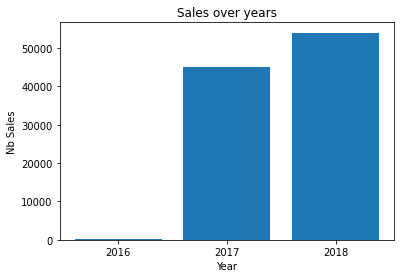

In [40]:
plt.bar(df.year,df.nb_sales) 
plt.xlabel('Year')
plt.ylabel('Nb Sales')
plt.title('Sales over years')
plt.show()


<h3>B) Implement functions that update a dataframe that stores months values (Month index to str Month) and add missing months</h3>

In [41]:
month_str = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.'  ]
month_index_to_str = dict(zip(range(1,13), month_str))

def add_to_df_missing_months(df):
    df.month = df.month.astype(int)
    df_months_list = df.month.to_list()
    for month in range(1,13):
        if month not in df_months_list:
            df = df.append({'month': month, 'nb_sales': 0}, ignore_index=True)
    df = df.sort_values(by=['month'])
    return df

def replace_int_month_to_str(df):
    df.month = df.month.astype(int)
    df.month = df.month.apply(lambda x: month_index_to_str[x])
    return df

<h3>C) Last Year Sales Vizualisation - Year 2018 month by month</h3>

In [42]:
df_2018 = pd.read_sql_query("""
SELECT strftime('%m', order_purchase_timestamp) AS month, COUNT(*) AS nb_sales 
FROM Order_
WHERE strftime('%Y', order_purchase_timestamp) = '2018'
GROUP BY month
ORDER BY month ASC
""", conn)
df_2018

,month,nb_sales
0,01,7269
1,02,6728
2,03,7211
3,04,6939
4,05,6873
5,06,6167
6,07,6292
7,08,6512
8,09,16
9,10,4


In [43]:
df_2018 = add_to_df_missing_months(df_2018)
df_2018 = replace_int_month_to_str(df_2018)
df_2018

,month,nb_sales
0,Jan.,7269
1,Feb.,6728
2,Mar.,7211
3,Apr.,6939
4,May,6873
5,Jun.,6167
6,Jul.,6292
7,Aug.,6512
8,Sept.,16
9,Oct.,4


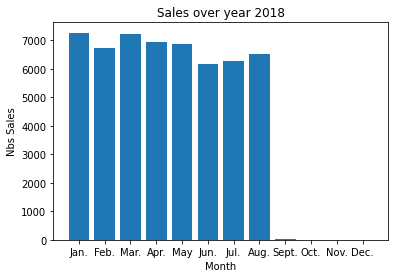

In [44]:
plt.bar(df_2018.month, df_2018.nb_sales) 
plt.xlabel('Month')
plt.ylabel('Nbs Sales')
plt.title('Sales over year 2018')
plt.show()

<h3>D) Comapare sales over years (2016, 2017 and 2018) month by month</h3>

In [45]:
df_2016 = pd.read_sql_query("""
SELECT strftime('%m', order_purchase_timestamp) as month, COUNT(*) AS nb_sales 
FROM Order_
WHERE strftime('%Y', order_purchase_timestamp) = '2016'
GROUP BY month
ORDER BY month ASC
""", conn)
df_2016

,month,nb_sales
0,09,4
1,10,324
2,12,1


In [46]:
df_2016 = add_to_df_missing_months(df_2016)
df_2016= replace_int_month_to_str(df_2016)
df_2016

,month,nb_sales
3,Jan.,0
4,Feb.,0
5,Mar.,0
6,Apr.,0
7,May,0
8,Jun.,0
9,Jul.,0
10,Aug.,0
0,Sept.,4
1,Oct.,324


In [47]:
df_2017 = pd.read_sql_query("""
SELECT strftime('%m', order_purchase_timestamp) as month, COUNT(*) AS nb_sales 
FROM Order_
WHERE strftime('%Y', order_purchase_timestamp) = '2017'
GROUP BY month
ORDER BY month ASC
""", conn)
df_2017

,month,nb_sales
0,01,800
1,02,1780
2,03,2682
3,04,2404
4,05,3700
5,06,3245
6,07,4026
7,08,4331
8,09,4285
9,10,4631


In [48]:
df_2017 = add_to_df_missing_months(df_2017)
df_2017= replace_int_month_to_str(df_2017)
df_2017

,month,nb_sales
0,Jan.,800
1,Feb.,1780
2,Mar.,2682
3,Apr.,2404
4,May,3700
5,Jun.,3245
6,Jul.,4026
7,Aug.,4331
8,Sept.,4285
9,Oct.,4631


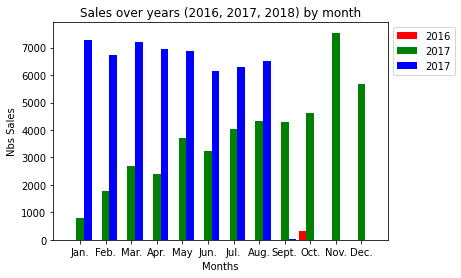

In [73]:
labels = df_2016.month.to_list()

x = np.arange(len(labels))  
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x-width, df_2016.nb_sales, width, label='2016',  color='r', align='center')
rects2 = ax.bar(x, df_2017.nb_sales, width, label='2017',  color='g', align='center')
rects3 = ax.bar(x + width, df_2018.nb_sales, width, label='2017',  color='b', align='center')

ax.set_ylabel('Nbs Sales')
ax.set_xlabel('Months')
ax.set_title('Sales over years (2016, 2017, 2018) by month')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

<h2>15) Customer Segmentation: Propose a simple customer segmentation</h2>

<h3>A) Get data from db and save it into df<h3>

In [50]:
df = pd.read_sql_query("""
SELECT Customer.customer_id, customer_zip_code_prefix, Customer.customer_city, customer_state, SUM(Item.price) as total_amount_spent
FROM Customer
INNER JOIN Order_ ON
    Customer.customer_id = Order_.customer_id
INNER JOIN Item ON
    Item.order_id = Order_.order_id
GROUP BY Customer.customer_id
ORDER BY total_amount_spent ASC
;
""", conn)
df

,customer_id,customer_zip_code_prefix,customer_city,customer_state,total_amount_spent
0,d01f8667e3c2c3c75fe19ecaad2c36a0,14840,guariba,SP,3.50
1,3eccb9c1241dd874da335a074221c39b,33140,santa luzia,MG,5.99
2,2c9e857e7297bae10093de84dde3961c,4086,sao paulo,SP,6.00
3,38bac1f6676c1e392e13ccb39448c210,3429,sao paulo,SP,6.33
4,0f218a0d9827580aaab2d6b9a6fe03fa,81130,curitiba,PR,6.50
...,...,...,...,...,...
30750,66e61c83b0c33d1a843ab2061bc2926b,55030,caruaru,PE,6673.00
30751,bbe745a98d9525399573bfb082bca172,13219,jundiai,SP,6735.00
30752,fd8630477788509b1d3ac9100f15869a,4565,sao paulo,SP,8071.59
30753,b7ee9b824b4a83b389379ac70585bf3b,76590,sao miguel do araguaia,GO,8110.00


<h3>B) Transform non-numerical labels to numerical labels</h3>

In [51]:
le = LabelEncoder()

In [52]:
df.customer_state = le.fit_transform(df.customer_state)
df.customer_zip_code_prefix = le.fit_transform(df.customer_zip_code_prefix)
df.customer_city = le.fit_transform(df.customer_city)

In [53]:
df

,customer_id,customer_zip_code_prefix,customer_city,customer_state,total_amount_spent
0,d01f8667e3c2c3c75fe19ecaad2c36a0,3718,999,25,3.50
1,3eccb9c1241dd874da335a074221c39b,5723,2195,10,5.99
2,2c9e857e7297bae10093de84dde3961c,1071,2385,25,6.00
3,38bac1f6676c1e392e13ccb39448c210,805,2385,25,6.33
4,0f218a0d9827580aaab2d6b9a6fe03fa,9112,739,17,6.50
...,...,...,...,...,...
30750,66e61c83b0c33d1a843ab2061bc2926b,7150,560,15,6673.00
30751,bbe745a98d9525399573bfb082bca172,3337,1325,25,6735.00
30752,fd8630477788509b1d3ac9100f15869a,1342,2385,25,8071.59
30753,b7ee9b824b4a83b389379ac70585bf3b,8778,2379,8,8110.00


<h3>C) Check columns summary statistics</h3>

In [54]:
df.describe()

,customer_zip_code_prefix,customer_city,customer_state,total_amount_spent
count,30755.000000,30755.000000,30755.000000,30755.000000
mean,5119.033100,1572.074459,18.733637,441.932814
std,2864.954118,809.496745,7.053950,443.269382
min,0.000000,0.000000,0.000000,3.500000
25%,2912.000000,848.000000,12.000000,170.000000
50%,4689.000000,1797.000000,22.000000,322.870000
75%,7308.000000,2368.500000,25.000000,564.620000
max,10621.000000,2727.000000,26.000000,13856.790000


<h3>D) Vizualise columns selected for the customer segmentation : "total_amount_spent" and "customer_state"</h3>

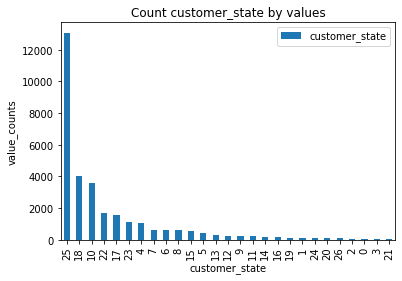

In [55]:
df.customer_state.value_counts().plot(kind='bar', 
                                      title='Count customer_state by values',
                                      use_index=True, 
                                      legend=True)
plt.xlabel("customer_state")
plt.ylabel("value_counts")
plt.show()

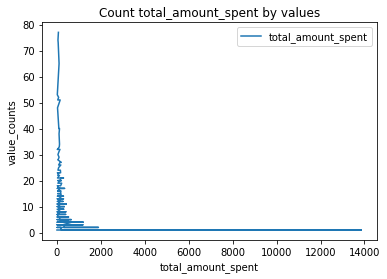

In [56]:
df.total_amount_spent.value_counts().plot(kind='line', 
                                          title='Count total_amount_spent by values',
                                          use_index=True, 
                                          legend=True)
plt.xlabel("total_amount_spent")
plt.ylabel("value_counts")
plt.show()

<h3>E) K-Means Implementation - Find the best number of clusters k between range(1,11) using the Elbow Method </h3>


In [57]:
df = df[["total_amount_spent", "customer_state"]]
df

,total_amount_spent,customer_state
0,3.50,25
1,5.99,10
2,6.00,25
3,6.33,25
4,6.50,17
...,...,...
30750,6673.00,15
30751,6735.00,25
30752,8071.59,25
30753,8110.00,8


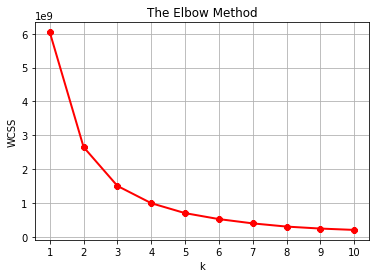

In [58]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("k")
plt.title("The Elbow Method")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

<h3>F) Run the K-Means with k=4</h3>

In [59]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

KMeans(n_clusters=4)

In [60]:
kmeans.cluster_centers_

array([[ 193.31505758,   18.76541669],
       [1190.89912125,   18.65224796],
       [ 564.14310497,   18.70490961],
       [2620.83791667,   18.64254386]])

In [61]:
set(kmeans.labels_.tolist())

{0, 1, 2, 3}

<h3>G) Plot Points Colored by clusters</h3>

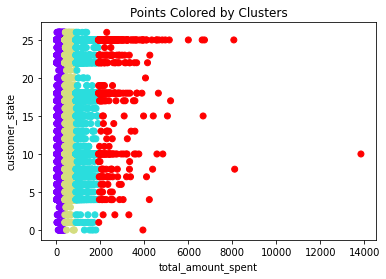

In [71]:
plt.scatter(df.total_amount_spent, df.customer_state, c=kmeans.labels_, cmap='rainbow', )
plt.title("Points Colored by Clusters")
plt.xlabel("total_amount_spent")
plt.ylabel("customer_state")
plt.show()

<h3>H) Plot Points Colored by clusters with Cluster Centers</h3>

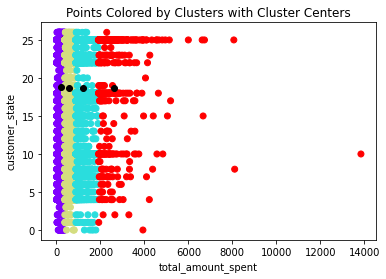

In [72]:
plt.scatter(df.total_amount_spent, df.customer_state, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title("Points Colored by Clusters with Cluster Centers")
plt.xlabel("total_amount_spent")
plt.ylabel("customer_state")
plt.show()

In [75]:
#conn.close()